In [15]:
## PHASE 1 – DATA PREPARATION ##
# Step 1: Import Required Libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [17]:
# Step 2: Define Paths and Image Settings

train_dir = "archive/train"
test_dir = "archive/test"

# Common settings
img_height = 48
img_width = 48
batch_size = 32

In [19]:
# Step 3: Create Image Generators (with validation split)

# Train: 85% train / 15% validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 24406 images belonging to 7 classes.
Found 4303 images belonging to 7 classes.


In [21]:
# Step 4: Test Generator for Final Evaluation

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [25]:
## PHASE 2: Model Building (VGGNet for FER2013) ##
# Step 1: Import Required Libraries


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)

In [27]:
# Step 2: Define the VGG-style CNN Model

def build_vgg_fer(input_shape=(48, 48, 1), num_classes=7):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # FC Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    return model

In [29]:
# Step 3: Compile the Model

model = build_vgg_fer()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-27 19:34:42.871438: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-27 19:34:42.871776: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-06-27 19:34:42.871782: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-06-27 19:34:42.871983: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-27 19:34:42.872654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] C

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,732,807 (10.42 MB)

 Trainable params: 2,731,911 (10.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [31]:
## Phase 3: Model Construction – VGG-Style CNN for Facial Emotion Recognition (FER2013) ##
# 1. Import Required Libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [33]:
# 2. Define the VGG-style CNN Model

def build_vgg_style_cnn(input_shape=(48, 48, 1), num_classes=7):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Dense layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [35]:
# 3. Compile the Model

model = build_vgg_style_cnn()

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,000,071 (22.89 MB)

 Trainable params: 5,998,279 (22.88 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [37]:
## PHASE 4: Model Training (FER2013 VGGNet) ##
# Step 1: Import Callbacks

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

In [39]:
# Step 2: Define Callbacks

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1),
    ModelCheckpoint('models/fer_vgg_best.h5', save_best_only=True, monitor='val_accuracy', verbose=1)
]

In [41]:
os.makedirs("models", exist_ok=True)

In [43]:
# Step 3: Fit the Model

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-06-27 19:43:14.018406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-06-27 19:43:14.025725: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2284 - loss: 2.1569
Epoch 1: val_accuracy improved from -inf to 0.38647, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 52s 61ms/step - accuracy: 0.2285 - loss: 2.1566 - val_accuracy: 0.3865 - val_loss: 1.6117 - learning_rate: 1.0000e-04
Epoch 2/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3481 - loss: 1.6442
Epoch 2: val_accuracy improved from 0.38647 to 0.43133, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.3481 - loss: 1.6442 - val_accuracy: 0.4313 - val_loss: 1.4821 - learning_rate: 1.0000e-04
Epoch 3/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3960 - loss: 1.5431
Epoch 3: val_accuracy improved from 0.43133 to 0.46014, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.3960 - loss: 1.5431 - val_accuracy: 0.4601 - val_loss: 1.3984 - learning_rate: 1.0000e-04
Epoch 4/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4324 - loss: 1.4591
Epoch 4: val_accuracy improved from 0.46014 to 0.50058, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.4324 - loss: 1.4591 - val_accuracy: 0.5006 - val_loss: 1.3451 - learning_rate: 1.0000e-04
Epoch 5/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4618 - loss: 1.4061
Epoch 5: val_accuracy improved from 0.50058 to 0.51452, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.4619 - loss: 1.4060 - val_accuracy: 0.5145 - val_loss: 1.2994 - learning_rate: 1.0000e-04
Epoch 6/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4818 - loss: 1.3513
Epoch 6: val_accuracy improved from 0.51452 to 0.52219, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.4818 - loss: 1.3512 - val_accuracy: 0.5222 - val_loss: 1.2840 - learning_rate: 1.0000e-04
Epoch 7/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4950 - loss: 1.3124
Epoch 7: val_accuracy improved from 0.52219 to 0.52917, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.4950 - loss: 1.3124 - val_accuracy: 0.5292 - val_loss: 1.2650 - learning_rate: 1.0000e-04
Epoch 8/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5158 - loss: 1.2556
Epoch 8: val_accuracy improved from 0.52917 to 0.53986, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5158 - loss: 1.2556 - val_accuracy: 0.5399 - val_loss: 1.2087 - learning_rate: 1.0000e-04
Epoch 9/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5423 - loss: 1.1986
Epoch 9: val_accuracy improved from 0.53986 to 0.54102, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5423 - loss: 1.1986 - val_accuracy: 0.5410 - val_loss: 1.2062 - learning_rate: 1.0000e-04
Epoch 10/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5567 - loss: 1.1645
Epoch 10: val_accuracy improved from 0.54102 to 0.55961, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5567 - loss: 1.1645 - val_accuracy: 0.5596 - val_loss: 1.1780 - learning_rate: 1.0000e-04
Epoch 11/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5661 - loss: 1.1308
Epoch 11: val_accuracy improved from 0.55961 to 0.56100, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5661 - loss: 1.1308 - val_accuracy: 0.5610 - val_loss: 1.1638 - learning_rate: 1.0000e-04
Epoch 12/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5875 - loss: 1.0840
Epoch 12: val_accuracy improved from 0.56100 to 0.58215, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5875 - loss: 1.0840 - val_accuracy: 0.5822 - val_loss: 1.1373 - learning_rate: 1.0000e-04
Epoch 13/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6008 - loss: 1.0507
Epoch 13: val_accuracy did not improve from 0.58215
763/763 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.6008 - loss: 1.0507 - val_accuracy: 0.5749 - val_loss: 1.1110 - learning_rate: 1.0000e-04
Epoch 14/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6141 - loss: 1.0196
Epoch 14: val_accuracy did not improve from 0.58215
763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6141 - loss: 1.0196 - val_accuracy: 0.5784 - val_loss: 1.1138 - learning_rate: 1.0000e-04
Epoch 15/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6331 - loss: 0.9706
Epoch 15: val_accuracy improved from 0.58215 to 0.58726, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6331 - loss: 0.9706 - val_accuracy: 0.5873 - val_loss: 1.1013 - learning_rate: 1.0000e-04
Epoch 16/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6468 - loss: 0.9412
Epoch 16: val_accuracy improved from 0.58726 to 0.59354, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.6468 - loss: 0.9412 - val_accuracy: 0.5935 - val_loss: 1.1011 - learning_rate: 1.0000e-04
Epoch 17/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6666 - loss: 0.8890
Epoch 17: val_accuracy did not improve from 0.59354
763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6666 - loss: 0.8890 - val_accuracy: 0.5914 - val_loss: 1.0896 - learning_rate: 1.0000e-04
Epoch 18/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6833 - loss: 0.8436
Epoch 18: val_accuracy did not improve from 0.59354
763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6833 - loss: 0.8436 - val_accuracy: 0.5833 - val_loss: 1.0995 - learning_rate: 1.0000e-04
Epoch 19/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6955 - loss: 0.8035
Epoch 19: val_accuracy did not improve from 0.59354
763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6955 - loss: 0.8035 - val_accuracy: 0.5733 - val_loss: 1.1230 - learning_rate: 1.0

763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.7165 - loss: 0.7597 - val_accuracy: 0.6017 - val_loss: 1.0910 - learning_rate: 1.0000e-04
Epoch 21/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7246 - loss: 0.7243
Epoch 21: val_accuracy did not improve from 0.60167
763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.7246 - loss: 0.7244 - val_accuracy: 0.6017 - val_loss: 1.1113 - learning_rate: 1.0000e-04
Epoch 22/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7428 - loss: 0.6843
Epoch 22: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 22: val_accuracy did not improve from 0.60167
763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.7428 - loss: 0.6843 - val_accuracy: 0.5875 - val_loss: 1.1589 - learning_rate: 1.0000e-04
Epoch 23/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7789 - loss: 0.5993
Epoch 23: val_accuracy improved from 0.60167 to 0.62026, saving model to models/fer_vgg_best.h5


763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.7789 - loss: 0.5993 - val_accuracy: 0.6203 - val_loss: 1.1156 - learning_rate: 5.0000e-05
Epoch 24/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7968 - loss: 0.5318
Epoch 24: val_accuracy did not improve from 0.62026
763/763 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.7968 - loss: 0.5318 - val_accuracy: 0.6165 - val_loss: 1.1227 - learning_rate: 5.0000e-05
Epoch 25/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8104 - loss: 0.5002
Epoch 25: val_accuracy did not improve from 0.62026
763/763 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.8104 - loss: 0.5002 - val_accuracy: 0.6170 - val_loss: 1.1652 - learning_rate: 5.0000e-05
Epoch 26/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8287 - loss: 0.4524
Epoch 26: val_accuracy did not improve from 0.62026
763/763 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.8286 - loss: 0.4524 - val_accuracy: 0.6073 - val_loss: 1.2089 - learning_rate: 5.0

In [45]:
# Step 4: Plot Accuracy and Loss

import matplotlib.pyplot as plt

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14,5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Val Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

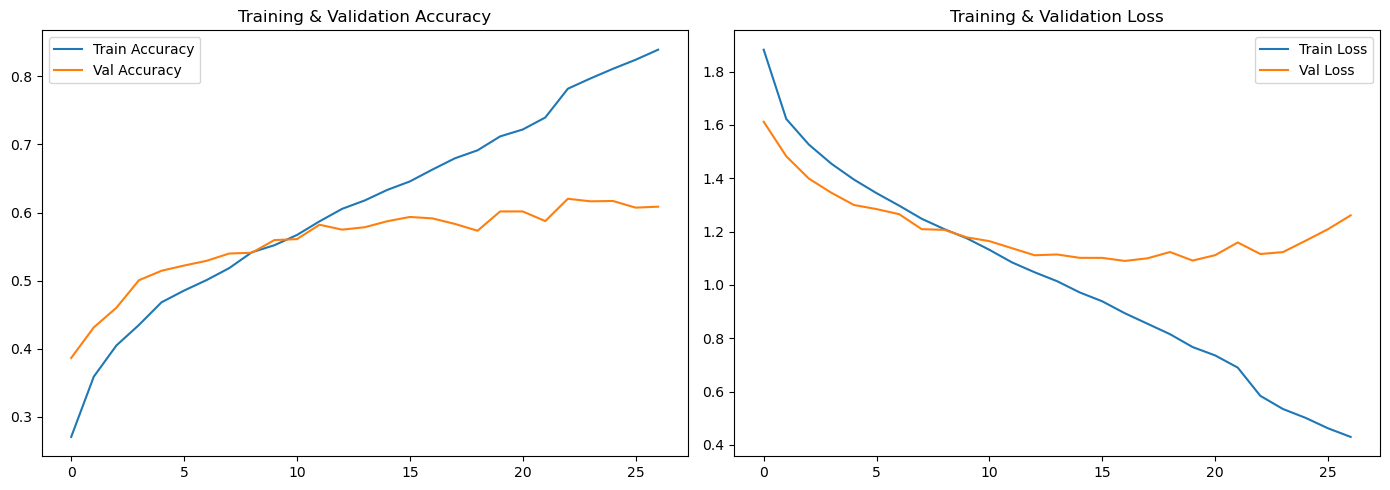

In [47]:
plot_training(history)

In [49]:
## PHASE 5: Model Evaluation ##
# Step 1: Load Best Model & Test Data

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load best model
model = load_model("models/fer_vgg_best.h5")

# Predict on test set
test_generator.reset()  # reset generator index
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

2025-06-27 20:10:26.898581: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


7178/7178 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step


              precision    recall  f1-score   support

       angry       0.57      0.48      0.52       958
     disgust       0.93      0.12      0.21       111
        fear       0.41      0.47      0.44      1024
       happy       0.87      0.80      0.83      1774
     neutral       0.55      0.65      0.59      1233
         sad       0.48      0.52      0.50      1247
    surprise       0.79      0.69      0.74       831

    accuracy                           0.61      7178
   macro avg       0.66      0.53      0.55      7178
weighted avg       0.63      0.61      0.62      7178



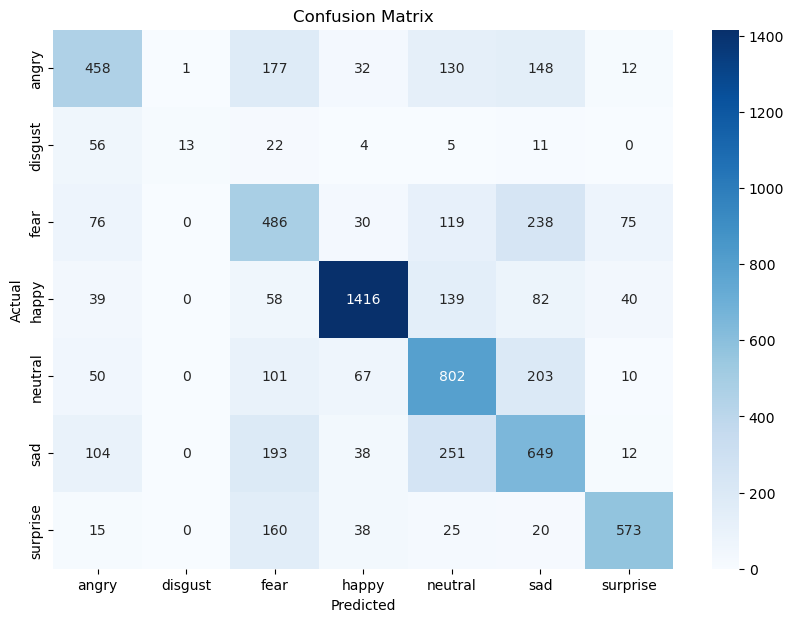

In [51]:
# Step 2: Classification Report & Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
# Step 3: Extract 3 Correct + 3 Incorrect Images

import shutil
import os

# Get file paths
filenames = test_generator.filepaths
correct = []
incorrect = []

for i, (true, pred) in enumerate(zip(y_true, y_pred)):
    if true == pred and len(correct) < 3:
        correct.append(i)
    elif true != pred and len(incorrect) < 3:
        incorrect.append(i)
    if len(correct) == 3 and len(incorrect) == 3:
        break

In [55]:
os.makedirs("samples", exist_ok=True)

def copy_images(indices, label):
    for i, idx in enumerate(indices):
        src = filenames[idx]
        dst = f"samples/{label}_{i+1}.png"
        shutil.copy(src, dst)
        print(f"Saved: {dst}")

copy_images(correct, "correct")
copy_images(incorrect, "incorrect")

Saved: samples/correct_1.png
Saved: samples/correct_2.png
Saved: samples/correct_3.png
Saved: samples/incorrect_1.png
Saved: samples/incorrect_2.png
Saved: samples/incorrect_3.png


In [59]:
print(train_generator.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [61]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load model
model = load_model('models/fer_vgg_best.h5')

# Label mapping (same as frontend and training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load a test image from the FER2013 test set
img_path = 'samples/correct_1.png'  # <-- Replace with actual test image path
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48, 48))
img = img.astype("float32") / 255.0
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = np.expand_dims(img, axis=-1)  # Add channel dimension (grayscale)

# Predict
pred = model.predict(img)
predicted_class = np.argmax(pred)
confidence = np.max(pred) * 100

print(f"Predicted: {class_names[predicted_class]} ({confidence:.2f}%)")

2025-06-28 19:11:11.836158: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Predicted: angry (54.53%)


In [65]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = image.load_img("samples/correct_1.png", color_mode="grayscale", target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = img_array.astype("float32") / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.5453292  0.06423506 0.16231877 0.03791898 0.04736303 0.12803832
  0.01479661]]


In [67]:
from tensorflow.keras.models import load_model
import numpy as np

model = load_model("models/fer_vgg_best.h5")

# Generate fake but valid test input
x = np.random.rand(1, 48, 48, 1).astype("float32")

# Predict
y = model.predict(x)
print("Prediction:", y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Prediction: [[0.36336452 0.00331182 0.21092336 0.00199954 0.06230248 0.3571103
  0.000988  ]]


2025-06-28 19:56:11.791270: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


In [69]:
for layer in model.layers:
    print(layer.name, layer.get_weights()[0].shape)

conv2d_3 (3, 3, 1, 64)
batch_normalization_3 (64,)
conv2d_4 (3, 3, 64, 64)
batch_normalization_4 (64,)


IndexError: list index out of range